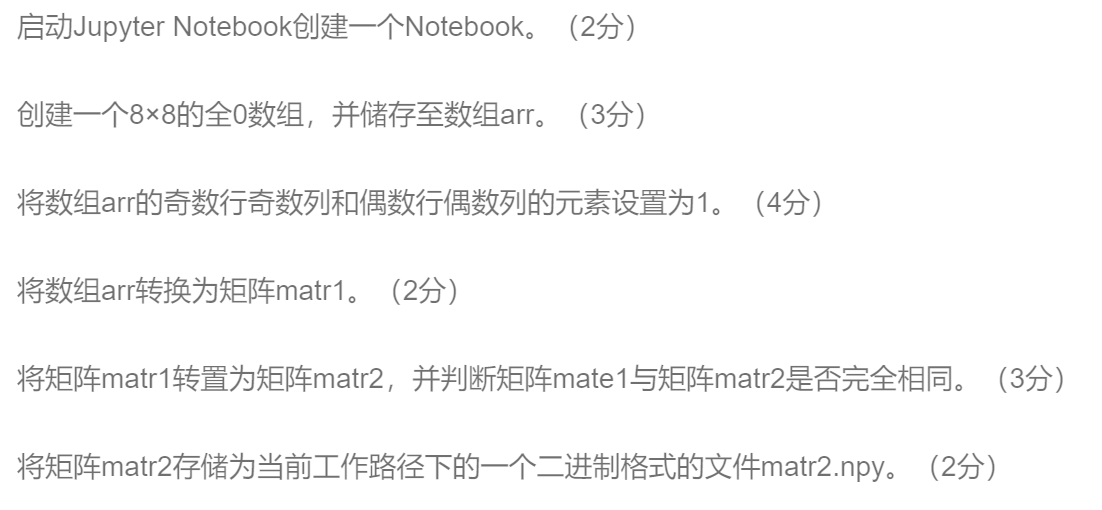

In [1]:
import numpy as np

# 第1小题：

# 第2小题：创建arr数组
arr = np.zeros((8,8))

# 第3小题：设置棋盘
for i in range(8):
    for j in range(8):
        if ((i%2==0 and j%2==0) or (i%2!=0 and j%2!=0)):
            arr[i][j] = 1

# 第4小题：将arr转换为矩阵matr1
matr1 = np.mat(arr)  

# 第5小题：转置matr1,并判断是否相等
matr2 = matr1.T
print(np.all(matr1 == matr2))

# 第6小题：保存数据
np.save('matr2.npy',matr2)

True


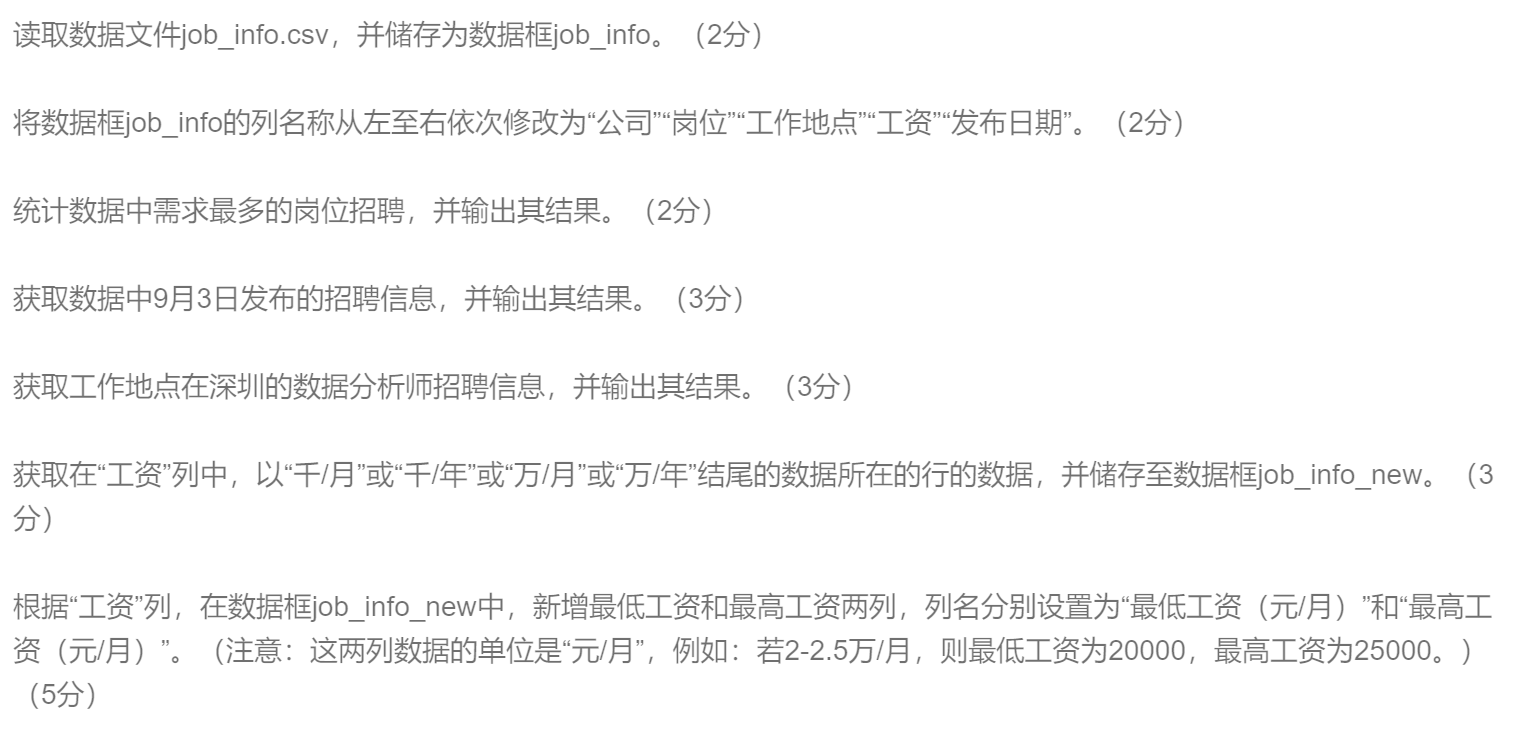

In [24]:
import pandas as pd

# 1
job_info=pd.read_csv('job_info.csv',encoding='gbk')

# 2 
job_info.columns=['公司','岗位','工作地点','工资','发布日期']

# 3
print(job_info.groupby(by='岗位').agg({"岗位":"count"}))

# 4
print(job_info[job_info['发布日期']=='09-03'])

# 5
j=job_info[job_info['岗位']=='数据分析师']
print(j[job_info['工作地点']=='深圳'])

# 6
job_info_new=job_info[job_info['工资'].str[-3:]==("万/月" or "万/年" or "千/月" or "千/年")]


# 7
length=job_info_new['工资'].size
job_info_new['最低工资（元/月）']=np.nan
job_info_new['最高工资（元/月）']=np.nan
for i in range(length):
    job_info_new.iloc[i,5]=str(float(job_info_new.iloc[i,3].split('-')[0])*10000)+"元/月"
    job_info_new.iloc[i,6]=str(float(job_info_new.iloc[i,3].split('-')[0])*10000)+"元/月"

           岗位
岗位           
仓库数据分析员   400
数据产品经理    999
数据分析师    4000
数据库管理员    100
                            公司       岗位    工作地点          工资   发布日期
0              甲骨文（中国）软件系统有限公司   数据产品经理      长沙         NaN  09-03
1     莱茵技术(上海)有限公司 TUV Rhei...   数据产品经理  上海-静安区         NaN  09-03
2          百度在线网络技术（北京）有限公司...   数据产品经理      北京      2-4万/月  09-03
3                     携程旅行网业务区   数据产品经理  上海-长宁区    1.5-2万/月  09-03
4          嘉吉投资（中国）有限公司南京分公...   数据产品经理      南京         NaN  09-03
...                        ...      ...     ...         ...    ...
5347            无锡明恒混合动力技术有限公司  仓库数据分析员  无锡-惠山区  0.9-1.6万/月  09-03
5348              四川良柏财税咨询有限公司  仓库数据分析员  成都-青羊区    4.5-6千/月  09-03
5349       陕西斯达防爆安全科技股份有限公司...  仓库数据分析员      西安  0.8-1.5万/月  09-03
5350                珠海文景科技有限公司  仓库数据分析员    异地招聘    1-1.5万/月  09-03
5351              广州友财信息科技有限公司  仓库数据分析员  广州-天河区  1.3-2.5万/月  09-03

[5314 rows x 5 columns]
                       公司     岗位 工作地点          工资   发布日期
1015  瑞庭网络技术（上海）有限公司深圳...  数据分

C:\Users\86195\AppData\Local\Temp\ipykernel_23884\3803908487.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(j[job_info['工作地点']=='深圳'])
C:\Users\86195\AppData\Local\Temp\ipykernel_23884\3803908487.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_info_new['最低工资（元/月）']=np.nan
C:\Users\86195\AppData\Local\Temp\ipykernel_23884\3803908487.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_info_new['最高工资（元/月）']=np.nan
C:\Users\86195\AppData\Local\Temp\ipyke

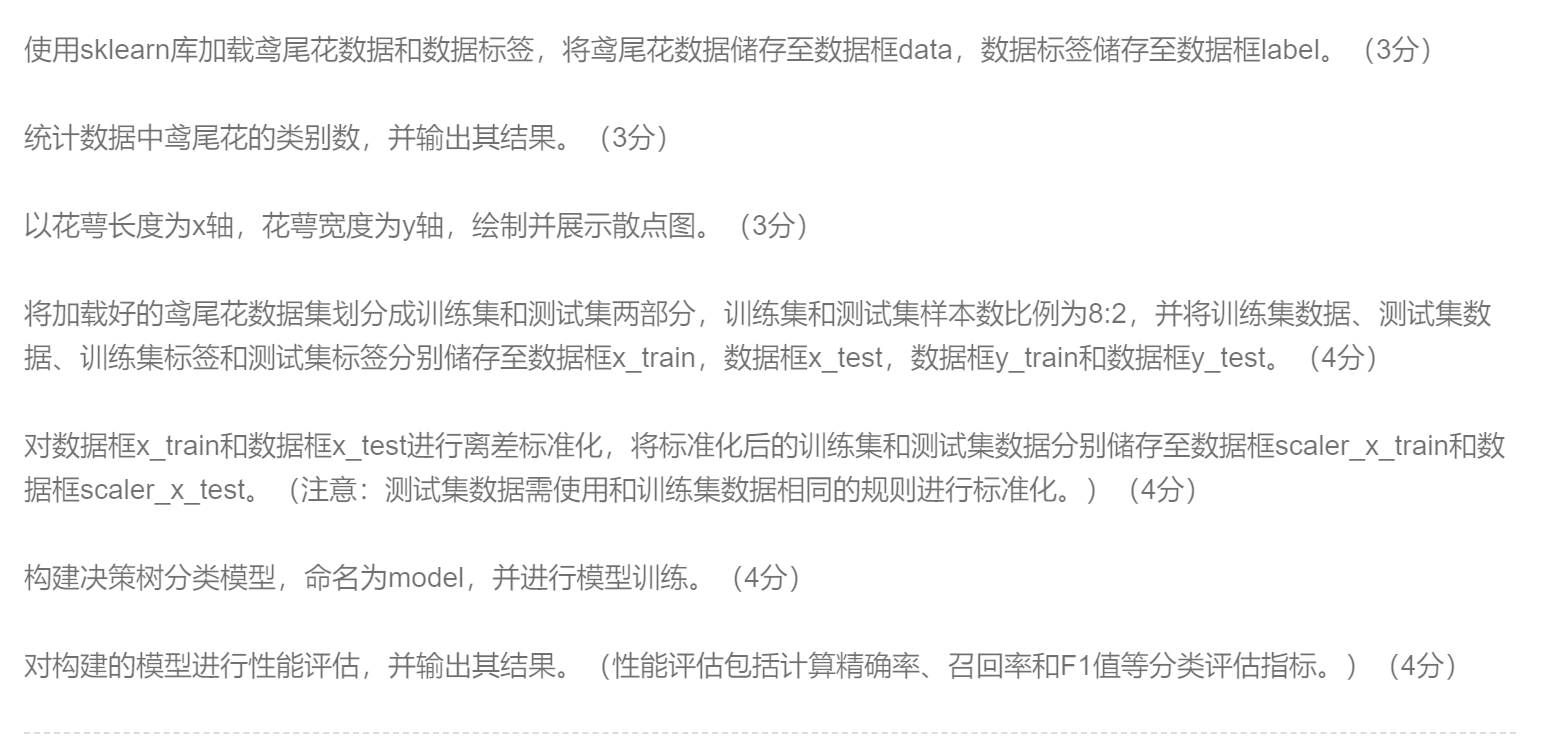

3


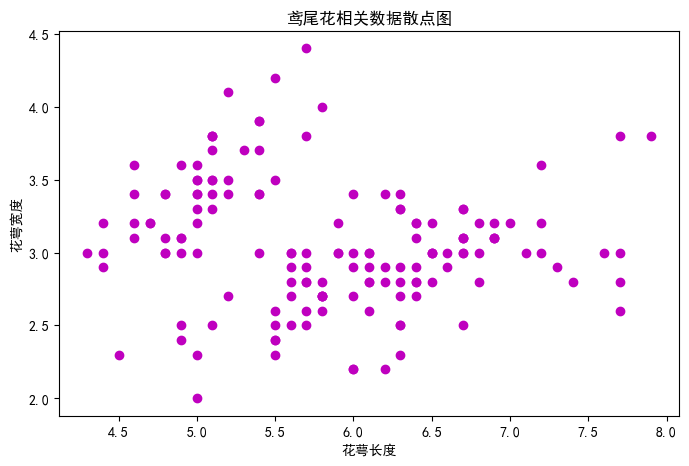

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      0.92      0.89        13
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.92        30
weighted avg       0.90      0.90      0.90        30



In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt


# 第1小题：读取并保存数据
iris=load_iris()
data=pd.DataFrame(iris['data'])
label=pd.DataFrame(iris['target'])

# 第2小题：统计类别
print(label.drop_duplicates().count()[0])

# 第3小题：绘制散点图
plt.rcParams['font.sans-serif']='SimHei'
plt.figure(figsize=(8,5))
plt.title('鸢尾花相关数据散点图')
plt.xlabel('花萼长度')
plt.ylabel('花萼宽度')
plt.scatter(data.iloc[:,0],data.iloc[:,1],c='m')
plt.show()

# 第4小题：划分数据
x_train,x_test,y_train,y_test=train_test_split(data,label,test_size=0.2)

# 第5小题：数据离差标准化
scaler_x_train=MinMaxScaler().fit_transform(x_train)
scaler_x_test=MinMaxScaler().fit_transform(x_test)

# 第6小题：构建分类模型
model=DecisionTreeClassifier().fit(x_train,y_train)

# 第7小题：评估模型
print(classification_report(y_test,model.predict(x_test)))

<hr><center>Author:Jason Black<center>